# Automated Machine Learning for Heart Disease Using h2o.ai

###  1. Exploratory Analysis

### 2. Machine Learning Model 

### 3. Model explained

### 4. Compare Predictions with test datase

### 5. Predicting a new variable

### 6. ROC curve


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

### Attribute Information:
##### Age: Age
##### Sex: Sex (1 = male; 0 = female)
##### ChestPain: Chest pain (typical, asymptotic, nonanginal, nontypical)
##### RestBP: Resting blood pressure
##### Chol: Serum cholestoral in mg/dl
##### Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
##### RestECG: Resting electrocardiographic results
##### MaxHR: Maximum heart rate achieved
##### ExAng: Exercise induced angina (1 = yes; 0 = no)
##### Oldpeak: ST depression induced by exercise relative to rest
##### Slope: Slope of the peak exercise ST segment
##### Ca: Number of major vessels colored by flourosopy (0 - 3)
##### Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
##### target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)

In [216]:
# Load the dataset: https://www.kaggle.com/datasets/volodymyrgavrysh/heart-disease
data = pd.read_csv("heart.csv")
dd = pd.read_csv("heart.csv")

# 1. Exploratory Analysis

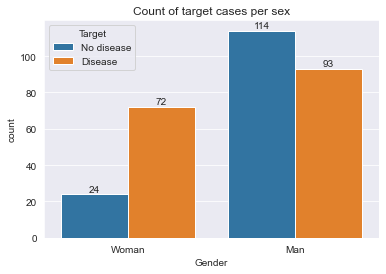

In [217]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
# create the countplot
sns.countplot(x='sex', hue='target', data=data, ax=ax)
ax.set_xticklabels([ 'Woman','Man'])
new_labels = ['No disease', 'Disease']

# count labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
ax.set_xlabel('Gender')
ax.legend(title='Target', labels=new_labels, loc='upper left')
ax.set_title('Count of target cases per sex')
plt.show()

Comparing the number of Heart Disease in women and man, is possible to observe that the number of cases are greater for women. 75% of womans have heart disease compared with 40% of man.

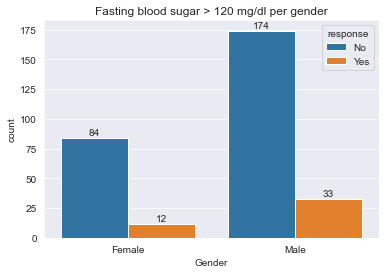

In [218]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
# create the countplot
sns.countplot(x='sex', hue='fbs', data=data, ax=ax)
ax.set_xticklabels([ 'Female','Male'])
new_labels = ['No', 'Yes']

# count labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
ax.set_xlabel('Gender')
ax.legend(title='response', labels=new_labels, loc='upper right')
ax.set_title('Fasting blood sugar > 120 mg/dl per gender')
plt.show()

 13% of womens have fasting blood sugar compared with 16% of man.

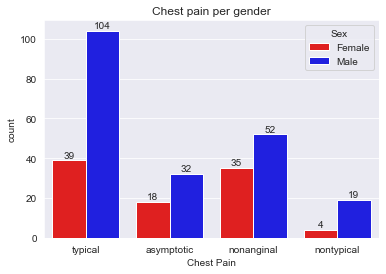

In [219]:
fig, ax = plt.subplots()

colors = [ "red","blue"]
sns.countplot(x='cp', hue='sex', data=data, ax=ax, palette= colors)
ax.set_xticklabels ([ 'typical','asymptotic','nonanginal','nontypical'])
new_labels =['Female','Male']

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
ax.set_xlabel('Chest Pain')
ax.legend(title='Sex', labels=new_labels,loc='upper right')
ax.set_title('Chest pain per gender')
plt.show()

It is possible for a man to experience more notable symptoms than a woman.

<Figure size 360x504 with 0 Axes>

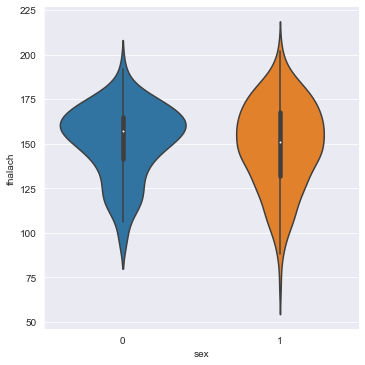

In [220]:
plt.figure(figsize = (5,7))
sns.catplot(data = data,kind="violin", x = 'sex', y = 'thalach');

Gender maximum heart rate achieved. 

<Figure size 360x504 with 0 Axes>

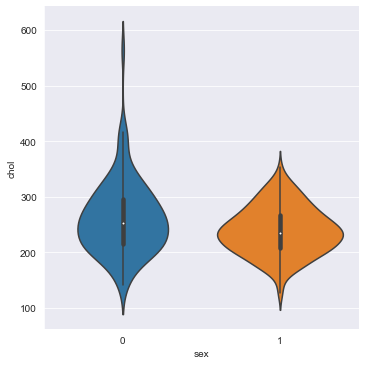

In [221]:
plt.figure(figsize =(5,7))
sns.catplot(data = data,kind="violin", x = 'sex', y = 'chol');

Gender serum cholestoral in mg/dl

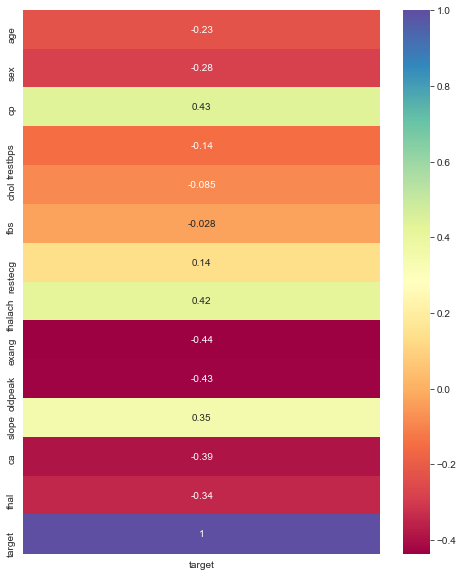

In [222]:
plt.figure(figsize = (8,10))
sns.heatmap(data.corr()['target'].to_frame(), annot = True,cmap="Spectral");

Correlation with 'target' variable.

# 2. Machine learning model 

In [223]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 53 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_marki_r3fqm2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.191 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


In [224]:
# Convert the Pandas data frame to H2OFrame
data = h2o.H2OFrame(data)

#  converting varibles to factor
data['target'] = data['target'].asfactor()
data['sex'] = data['sex'].asfactor()
data['cp'] = data['cp'].asfactor()
data['thal'] = data['thal'].asfactor()
data['fbs'] = data['fbs'].asfactor()
data['restecg'] = data['restecg'].asfactor()
data['exang'] = data['exang'].asfactor()
data.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:303
Cols:14

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int,enum,enum,int,int,enum,enum,int,enum,real,int,int,enum,enum
mins,29.0,,,94.0,126.0,,,71.0,,0.0,0.0,0.0,,
mean,54.36633663366333,,,131.62376237623772,246.26402640264035,,,149.6468646864687,,1.0396039603960392,1.3993399339933994,0.7293729372937293,,
maxs,77.0,,,200.0,564.0,,,202.0,,6.2,2.0,4.0,,
sigma,9.08210098983786,,,17.538142813517098,51.83075098793005,,,22.905161114914087,,1.1610750220686346,0.6162261453459621,1.0226063649693276,,
zeros,0,,,0,0,,,0,,99,21,175,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0.0,0.0,1,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0.0,0.0,2,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2.0,0.0,2,1


### Training and testing split

In [225]:
train, test = data.split_frame([0.8],seed=1234)

In [226]:
test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
58,0,3,150,283,1,0,162,0,1,2,0,2,1
66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
53,1,2,130,197,1,0,152,0,1.2,0,0,2,1


### Specifying the target 

In [227]:
predictors = data.columns
response_col = "target"
predictors.remove(response_col)

### Model 

In [228]:
model = H2OGeneralizedLinearEstimator(family = "binomial",alpha=1, nfolds=20)

model.train(x = predictors, y = response_col, training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1681585995412_210


GLM Model: summary
    family    link    regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 0.02284 )  24                            13                             4                       py_154_sid_b65a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11857959122663496
RMSE: 0.3443538749987213
LogLoss: 0.384555041094399
AUC: 0.9153738644304682
AUCPR: 0.9248111364905109
Gini: 0.8307477288609364
Null degrees of freedom: 240
Residual degrees of freedom: 227
Null deviance: 330.5988438123613
Residual deviance: 185.35552980750035
AIC: 213.35552980750035

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5181526804104913
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      84   22   0.2075   (22.0/106.0)
1      11   124  0.0815   (11.0/135.0)
Total  95   146  0.1369   (33.0/241.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.518153     0.882562  144
max f2                       0.218718     0.921596  185
max f0point5                 0.644004     0.874799  121
max accuracy                 0.529843     0.863071  142
max precision                0.957988     1         0
max recall                   0.168971     1         200
max specificity              0.957988     1         0
max absolute_mcc             0.518153     0.72216   144
max min_per_class_accuracy   0.590487     0.830189  130
max mean_per_class_accuracy  0.529843     0.856499  142
max tns                      0.957988     106       0
max fns                      0.957988     134       0
max fps                      0.0100393    106       239
max tps                      0.168971     135       200
max tnr                      0.957988     1         0
max fnr                      0.957988     0.992593  0
max fpr                      0.0100393    1         239
max tpr                      0.168971     1         200

Gains/Lift Table: Avg response rate: 56.02 %, avg score: 56.02 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0124481                   0.937369           1.78519    1.78519            1                0.947725   1                           0.947725            0.0222222       0.0222222                  78.5185   78.5185            0.0222222
2        0.0207469                   0.93419            1.78519    1.78519            1                0.935791   1                           0.942952            0.0148148       0.037037                   78.5185   78.5185            0.037037
3        0.033195                    0.932567           1.78519    1.78519            1                0.93307    1                           0.939246            0.0222222       0.0592593                  78.5185   78.5185            0.0592593
4        0.0414938                   0.930103           1.78519    1.78519            1                0.931519   1                           0.937701            0.0148148       0.0740741                  78.5185   78.5185            0.0740741
5        0.0539419                   0.92

### alpha = 1 decrease the number of False Negatives(FN). It is important to note that this number is more important than False Positives(FP) values in that particular case of heart disease.

### Performance

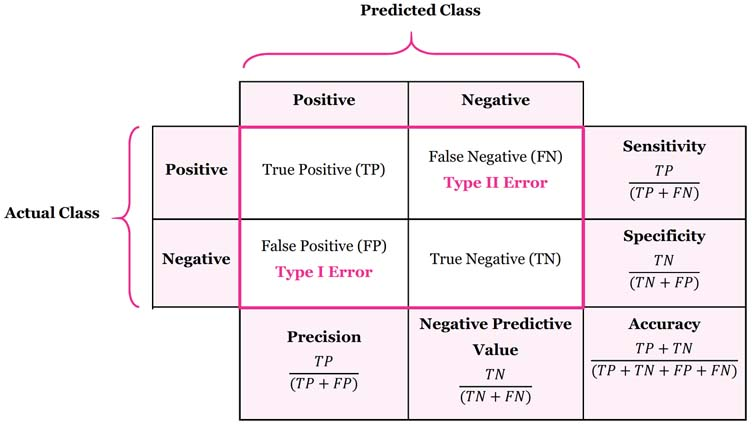

In [63]:
from IPython.display import Image
Image(r"C:\Users\marki\Downloads\confusion.jpg") 

In [229]:
model.model_performance(test_data=test)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.12903411577714388
RMSE: 0.35921318987078393
LogLoss: 0.41497785264866305
AUC: 0.921875
AUCPR: 0.9220940860203073
Gini: 0.84375
Null degrees of freedom: 61
Residual degrees of freedom: 48
Null deviance: 87.33823102336312
Residual deviance: 51.45725372843422
AIC: 79.45725372843421

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5759714504377358
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      27   5    0.1562   (5.0/32.0)
1      3    27   0.1      (3.0/30.0)
Total  30   32   0.129    (8.0/62.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.575971     0.870968  31
max f2                       0.439276     0.91195   38
max f0point5                 0.659323     0.860656  22
max accuracy                 0.575971     0.870968  31
max precision                0.918026     1         0
max recall                   0.189356     1         50
max specificity              0.918026     1         0
max absolute_mcc             0.575971     0.74375   31
max min_per_class_accuracy   0.580367     0.84375   30
max mean_per_class_accuracy  0.575971     0.871875  31
max tns                      0.918026     32        0
max fns                      0.918026     29        0
max fps                      0.0797179    32        61
max tps                      0.189356     30        50
max tnr                      0.918026     1         0
max fnr                      0.918026     0.966667  0
max fpr                      0.0797179    1         61
max tpr                      0.189356     1         50

Gains/Lift Table: Avg response rate: 48.39 %, avg score: 52.39 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.016129                    0.914177           2.06667   2.06667            1                0.918026   1                           0.918026            0.0333333       0.0333333                  106.667   106.667            0.0333333
2        0.0322581                   0.911681           2.06667   2.06667            1                0.911716   1                           0.914871            0.0333333       0.0666667                  106.667   106.667            0.0666667
3        0.0322581                   0.911582           0         2.06667            0                0          1                           0.914871            0               0.0666667                  -100      106.667            0.0666667
4        0.0483871                   0.902489           2.06667   2.06667            1                0.911554   1                           0.913766            0.0333333       0.1                        106.667   106.667            0.1
5        0.0645161                   0.890918           2.06667   2.06667            1                0.890951   1                           0.908062            0.0333333       0.133333                   106.667   106.667            0.133333
6        0.112903                    0.867737           2.06667   2.06667            1                0.879927   1                           0.896004            0.1             0.233333                   106.667   106.667            0.233333
7        0.16129                     0.830215           2.06667   2.06667            1                0.843694   1                           0.880311            0.1             0.333333                   106.667   106

# 3. Model explained

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_model_python_1681585995412_210

,0,1,Error,Rate
0,27.0,5.0,0.1562,(5.0/32.0)
1,3.0,27.0,0.1,(3.0/30.0)
Total,30.0,32.0,0.129,(8.0/62.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

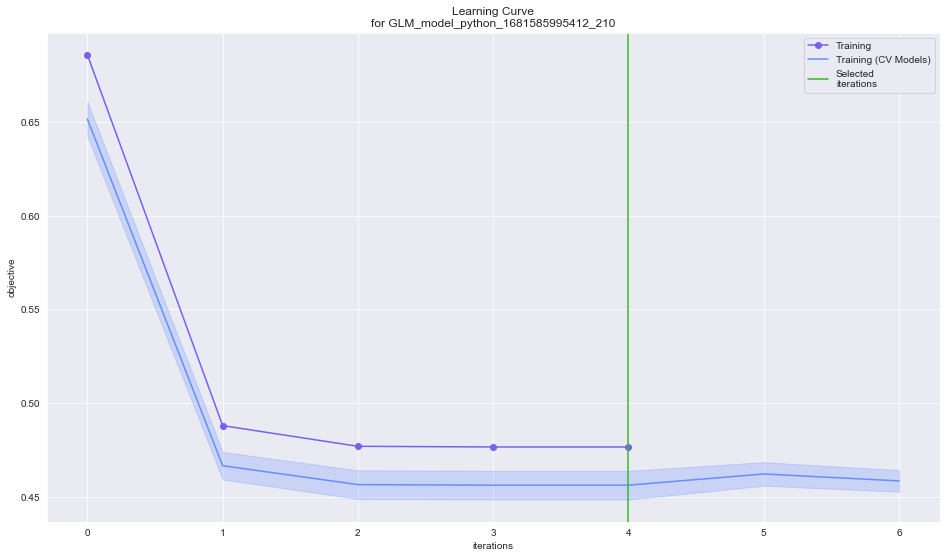

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

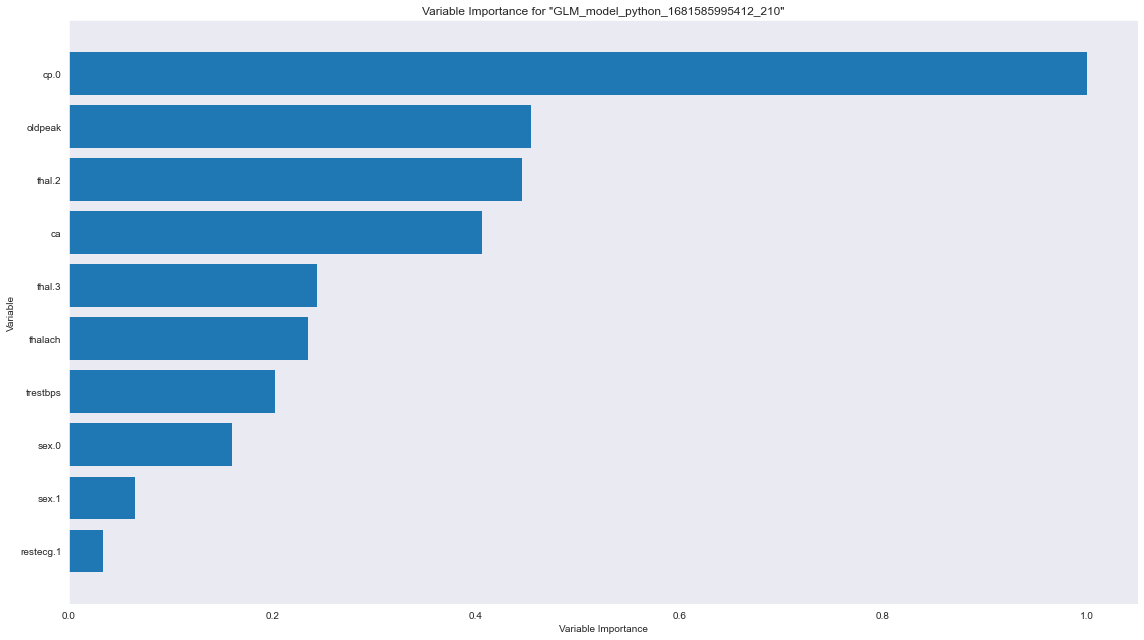

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

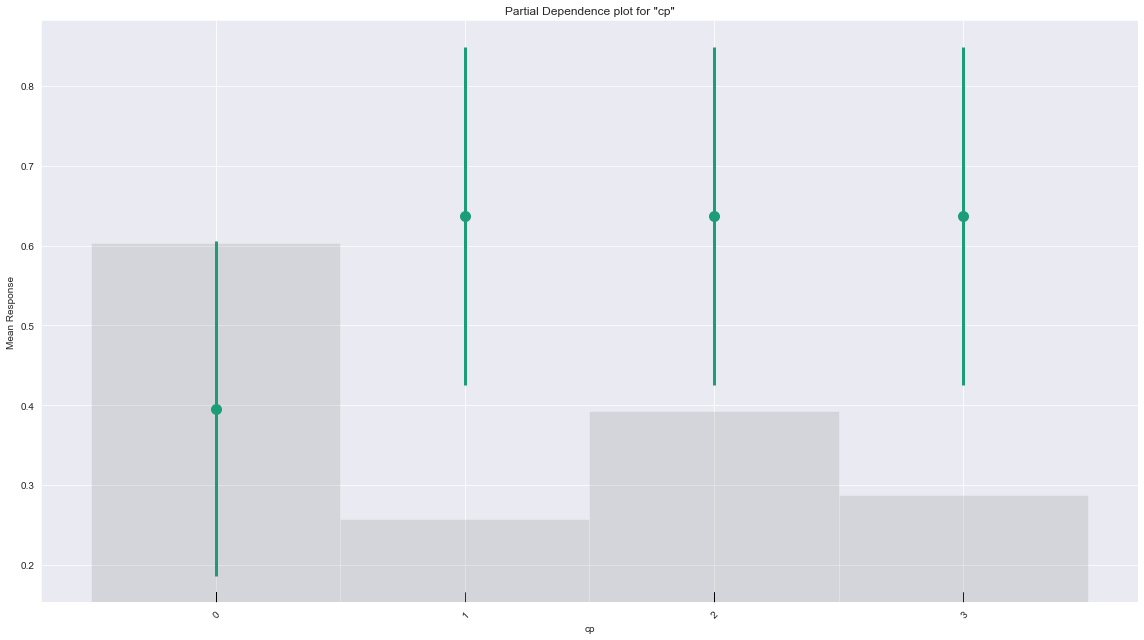

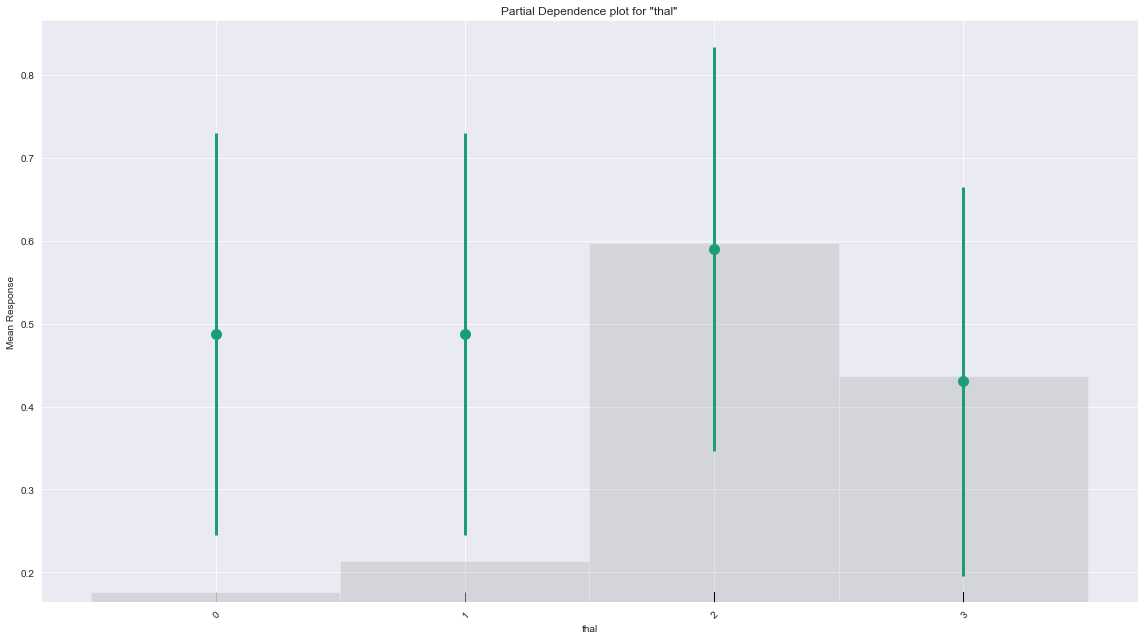

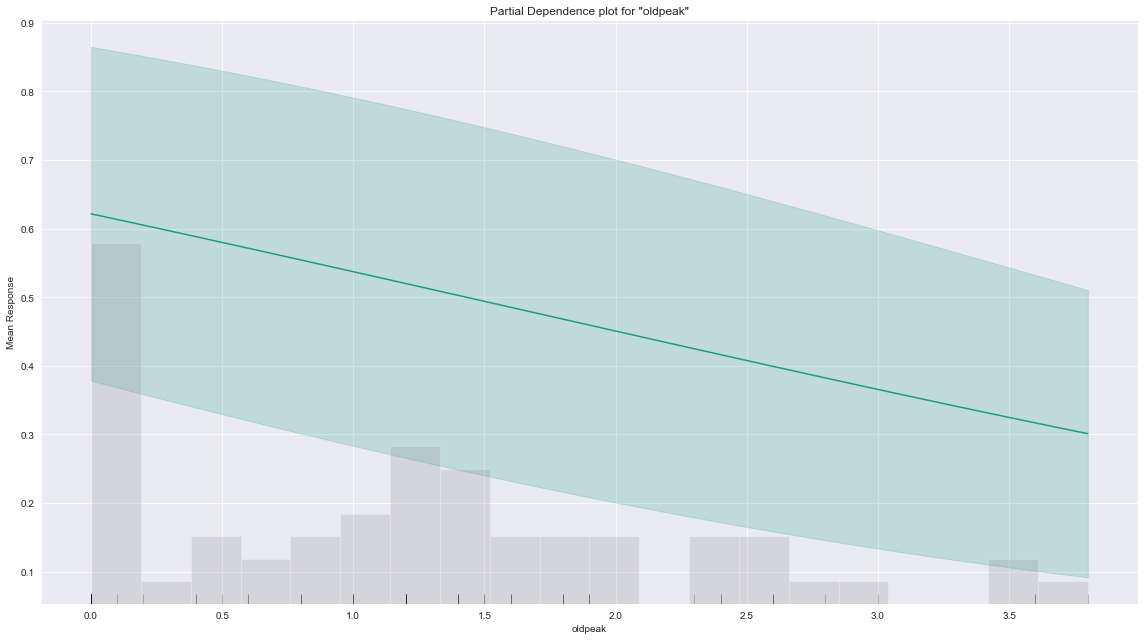

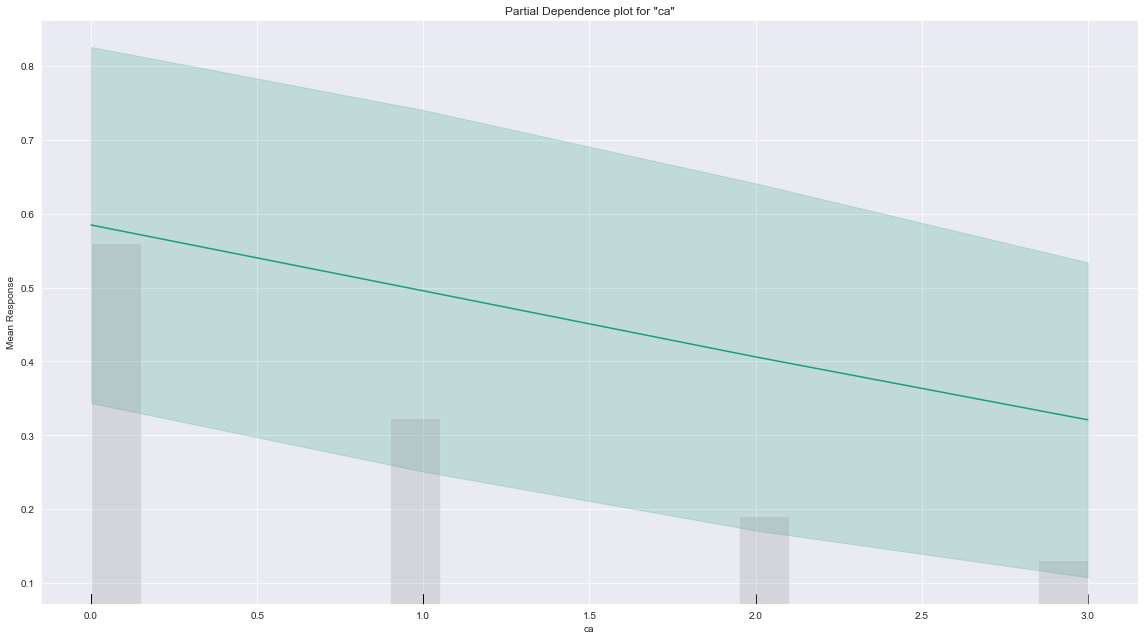

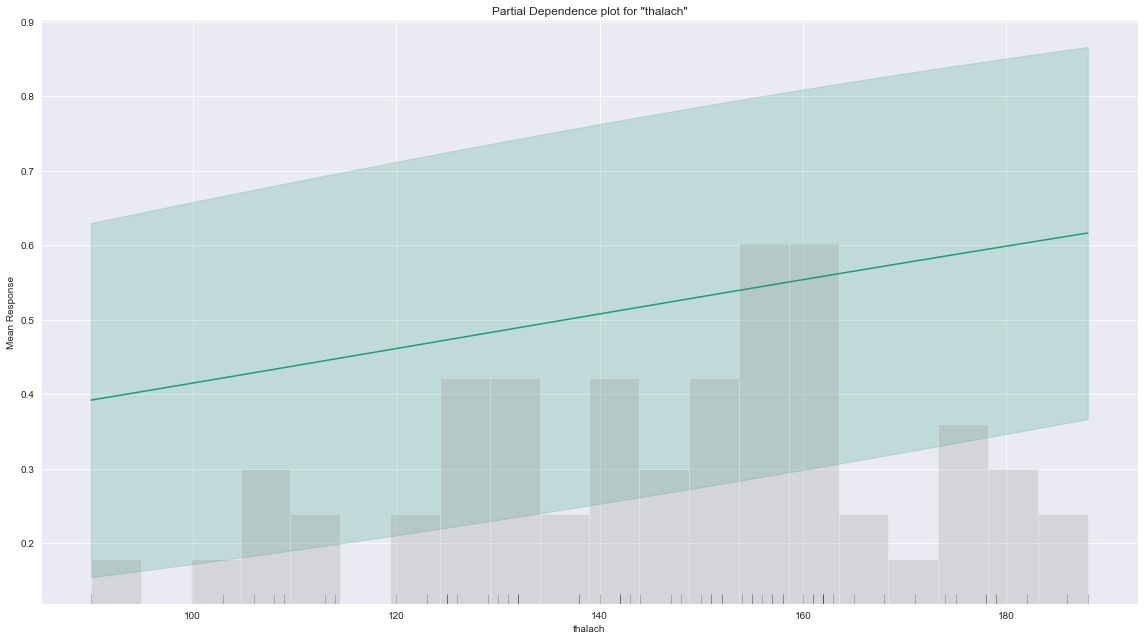

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_model_python_1681585995412_210

,0,1,Error,Rate
0,27.0,5.0,0.1562,(5.0/32.0)
1,3.0,27.0,0.1,(3.0/30.0)
Total,30.0,32.0,0.129,(8.0/62.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [230]:
model.explain(test)

# Compare Predictions with test datase

In [231]:
predictions = model.predict(test)

test_with_predictions = test.cbind(predictions)
test_with_predictions.as_data_frame()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predict,p0,p1
0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0.109708,0.890292
1,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,1,0.217401,0.782599
2,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,1,0.167517,0.832483
3,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1,1,0.419633,0.580367
4,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1,0,0.489071,0.510929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,0,0.546587,0.453413
58,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0,0,0.858965,0.141035
59,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0,0,0.919017,0.080983
60,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0.605433,0.394567


## Different results

In [232]:
different_rows = test_with_predictions[test_with_predictions['target'] != test_with_predictions['predict']]
different_rows.as_data_frame()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predict,p0,p1
0,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1,0,0.489071,0.510929
1,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,0,0.560724,0.439276
2,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1,0,0.810644,0.189356
3,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0,1,0.235505,0.764495
4,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0,1,0.398489,0.601511
5,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0,1,0.380881,0.619119
6,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1,0.232232,0.767768
7,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,1,0.455017,0.544983
8,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,0.348941,0.651059


All the wrong predictions were from man.

# Predicting a new variable

In [233]:
new_row = h2o.H2OFrame({'age': [63], 
                        'sex': [0], 
                        'cp': [3],
                       'trestbps': [145],
                       'chol': [233],
                       'fbs': [1],
                       'restecg': [0],
                       'thalach': [150],
                       'exang': [0],
                       'oldpeak': [2.3],
                       'slope': [0],
                       'ca': [0],
                       'thal': [1]} )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [234]:
model.predict(new_row)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.402468,0.597532


In [211]:
#perf = model.model_performance(test)
#accuracy = perf.accuracy()[0][1]
##precision = perf.precision()[0][1]
#recall = perf.recall()[0][1]
#f1_score = perf.F1()[0][1]
# print the metrics
#print("Accuracy: {:.3f}".format(accuracy))
#print("Precision: {:.3f}".format(precision))
#print("Recall: {:.3f}".format(recall))
#print("F1-score: {:.3f}".format(f1_score))

## ROC curve

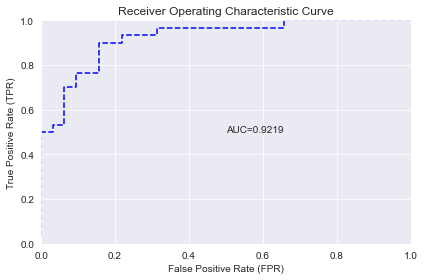

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.03125,
  0.03125,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.09375,
  0.09375,
  0.09375,
  0.125,
  0.15625,
  0.15625,
  0.15625,
  0.15625,
  0.15625,
  0.1875,
  0.21875,
  0.21875,
  0.25,
  0.28125,
  0.3125,
  0.3125,
  0.34375,
  0.375,
  0.40625,
  0.4375,
  0.46875,
  0.5,
  0.53125,
  0.5625,
  0.59375,
  0.625,
  0.65625,
  0.65625,
  0.6875,
  0.71875,
  0.75,
  0.78125,
  0.8125,
  0.84375,
  0.875,
  0.90625,
  0.9375,
  0.96875,
  1.0],
 [0.03333333333333333,
  0.06666666666666667,
  0.1,
  0.13333333333333333,
  0.16666666666666666,
  0.2,
  0.23333333333333334,
  0.26666666666666666,
  0.3,
  0.3333333333333333,
  0.36666666666666664,
  0.4,
  0.43333333333333335,
  0.4666666666666667,
  0.5,
  0.5,
  0.5333333333333333,
  0.5333333333333333,
  0.5666666666666667,
  0.6,
  0.6333333333333333,
  0.6666666666666666,
  0.7,
  0.7,
  0.73333333

In [235]:
gbm_perf = model.model_performance(test_data=test)
gbm_perf.plot()

# Shutdown H2O
#h2o.shutdown()